# Explore here

In [39]:
!pip install -r "/workspaces/Decision-tree/requirements.txt"

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [59]:
!pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=6f6d1fb7c31473ba6e72d005b6429337ff14487af77f896ae82da6644e12e32c
  Stored in directory: /home/vscode/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [74]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import pydotplus

from IPython.display import Image
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_percentage_error, f1_score, accuracy_score, make_scorer
from io import StringIO

from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
from IPython.display import Image
import matplotlib.pyplot as plt

In [41]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df = pd.read_csv(url)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age')])

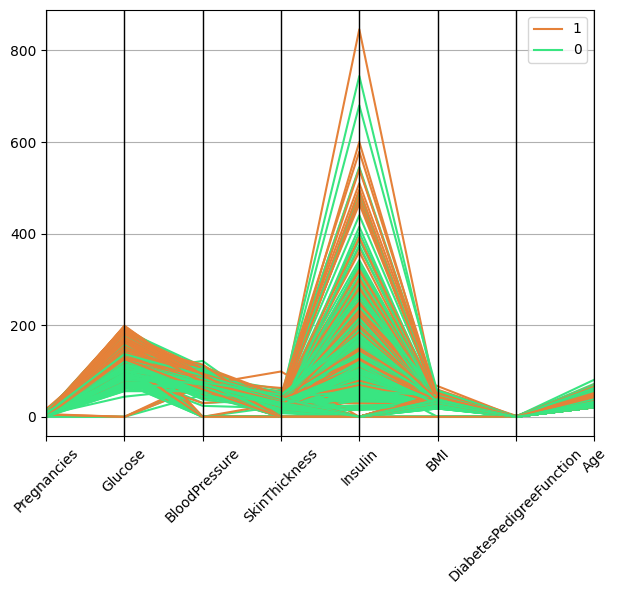

In [44]:
#EDA

pd.plotting.parallel_coordinates(df, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))
plt.tight_layout()
plt.xticks(rotation=45)

In [45]:
#ML
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


<Axes: ylabel='Frequency'>

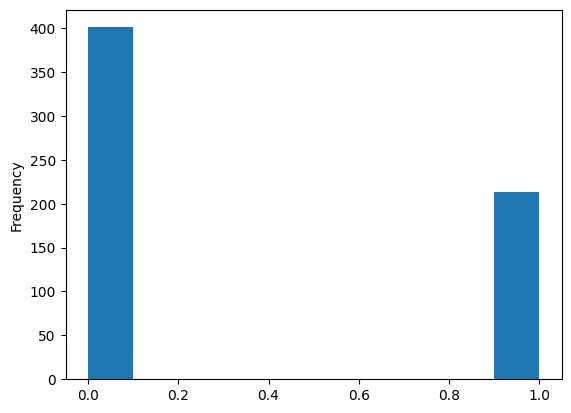

In [46]:
y_train.plot.hist()

<Axes: ylabel='Frequency'>

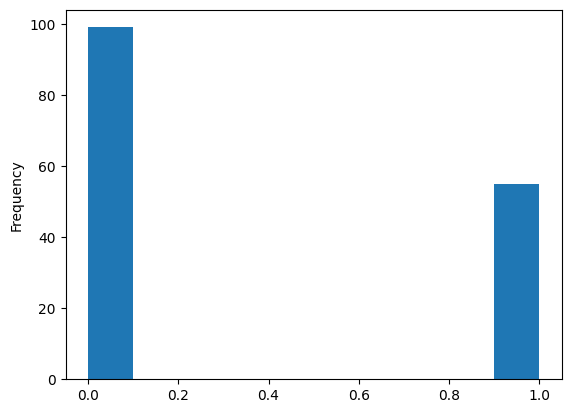

In [47]:
y_test.plot.hist()

<Axes: ylabel='Frequency'>

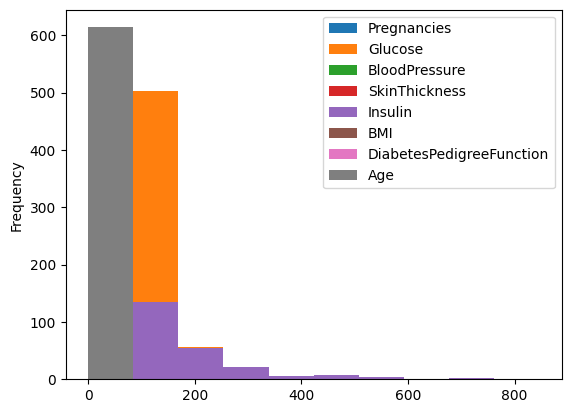

In [48]:
X_train.plot.hist()

<Axes: ylabel='Frequency'>

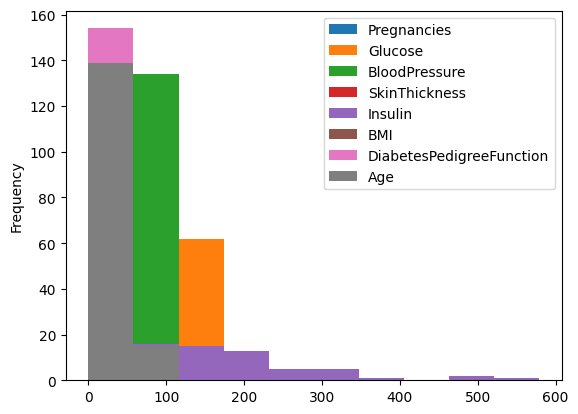

In [49]:
X_test.plot.hist()

In [50]:
X_train.to_csv("X_train.csv")
X_test.to_csv("X_test.csv")
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")

In [51]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

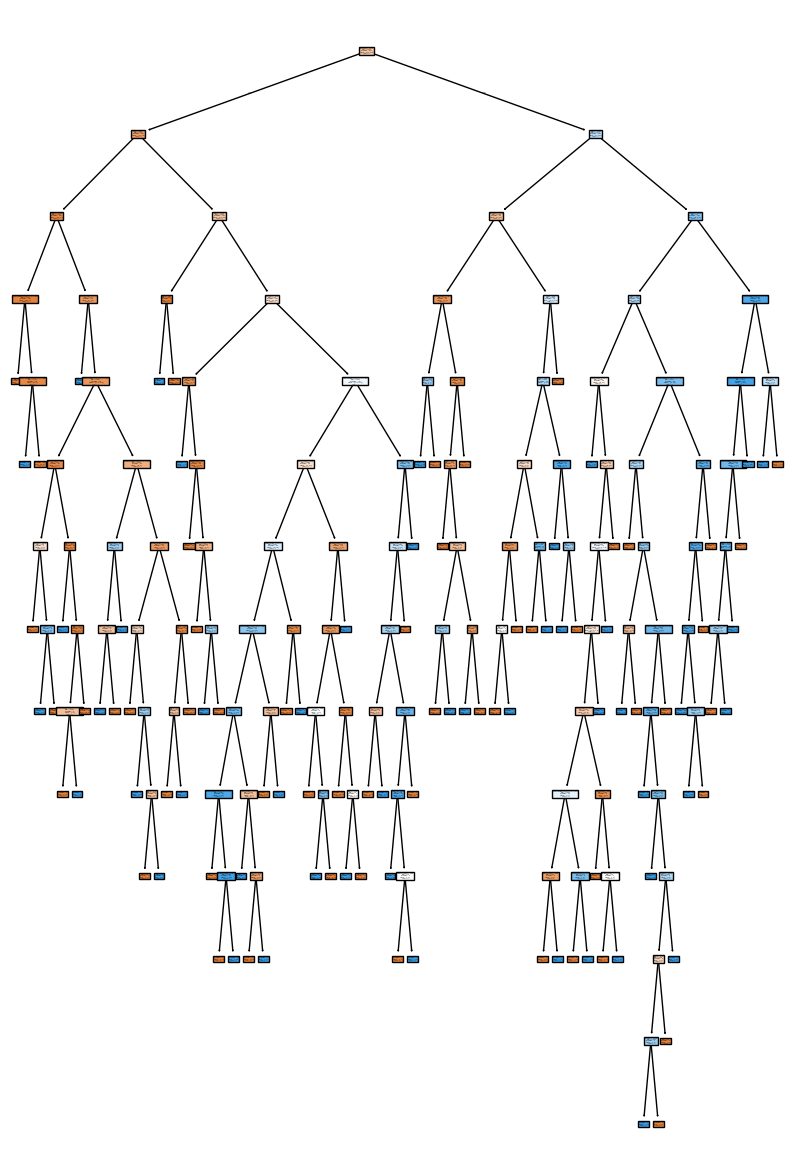

In [52]:
fig = plt.figure(figsize=(10,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
plt.savefig("diabetes.jpg")
plt.show()

In [70]:
def plot_decision_tree(clf, feature_name, target_name):
    dot_data = io.StringIO()()
    tree.export_graphviz(clf, out_file=dot_data,
                         feature_names=feature_name,
                         class_names=target_name,
                         filled=True, rounded=True,
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    plt.savefig("./dt.png")
    return image(graph.create_png())

In [79]:
class_train_pred = model.predict(X_train)
class_test_pred = model.predict(X_test)

In [87]:
print("The training accuracy score is", accuracy_score(class_train_pred, y_train))
print("The testing accuracy score is", accuracy_score(class_test_pred, y_test))

The training accuracy score is 1.0
The testing accuracy score is 0.7467532467532467


In [88]:
print("The training F1 score is", f1_score(class_train_pred, y_train))
print("The testing F1 score is", f1_score(class_test_pred, y_test))

The training F1 score is 1.0
The testing F1 score is 0.6722689075630253


In [ ]:
df_list = sorted(list(df.colums))
df_list

In [ ]:
x = df.drop["Heart disease_number", axis = 1]
y = df["Heart disease_number"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)

x_train.head()

In [91]:
parameters = {
              'max_depth':[1,2,3,4,5],
              'min_samples_leaf':[1,2,3,4,5],
              'min_samples_split':[2,3,4,5],
              'criterion' : ['gini','entropy']
             }
scorer = make_scorer(f1_score)

In [97]:
random = RandomizedSearchCV(model, parameters, scoring=scorer)

In [99]:
random.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5]},
                   scoring=make_scorer(f1_score, response_method='predict'))

In [101]:
random_out = random.fit(X_train, y_train)
random_out


RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5]},
                   scoring=make_scorer(f1_score, response_method='predict'))

In [102]:
best = random_out.best_estimator_
best

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=3,
                       random_state=42)

In [106]:
class_train_pred = best.predict(X_train)
class_test_pred = best.predict(X_test)

In [107]:
print("The training F1 score is", accuracy_score(class_train_pred, y_train))
print("The testing F1 score is", accuracy_score(class_test_pred, y_test))

The training F1 score is 0.7964169381107492
The testing F1 score is 0.6883116883116883


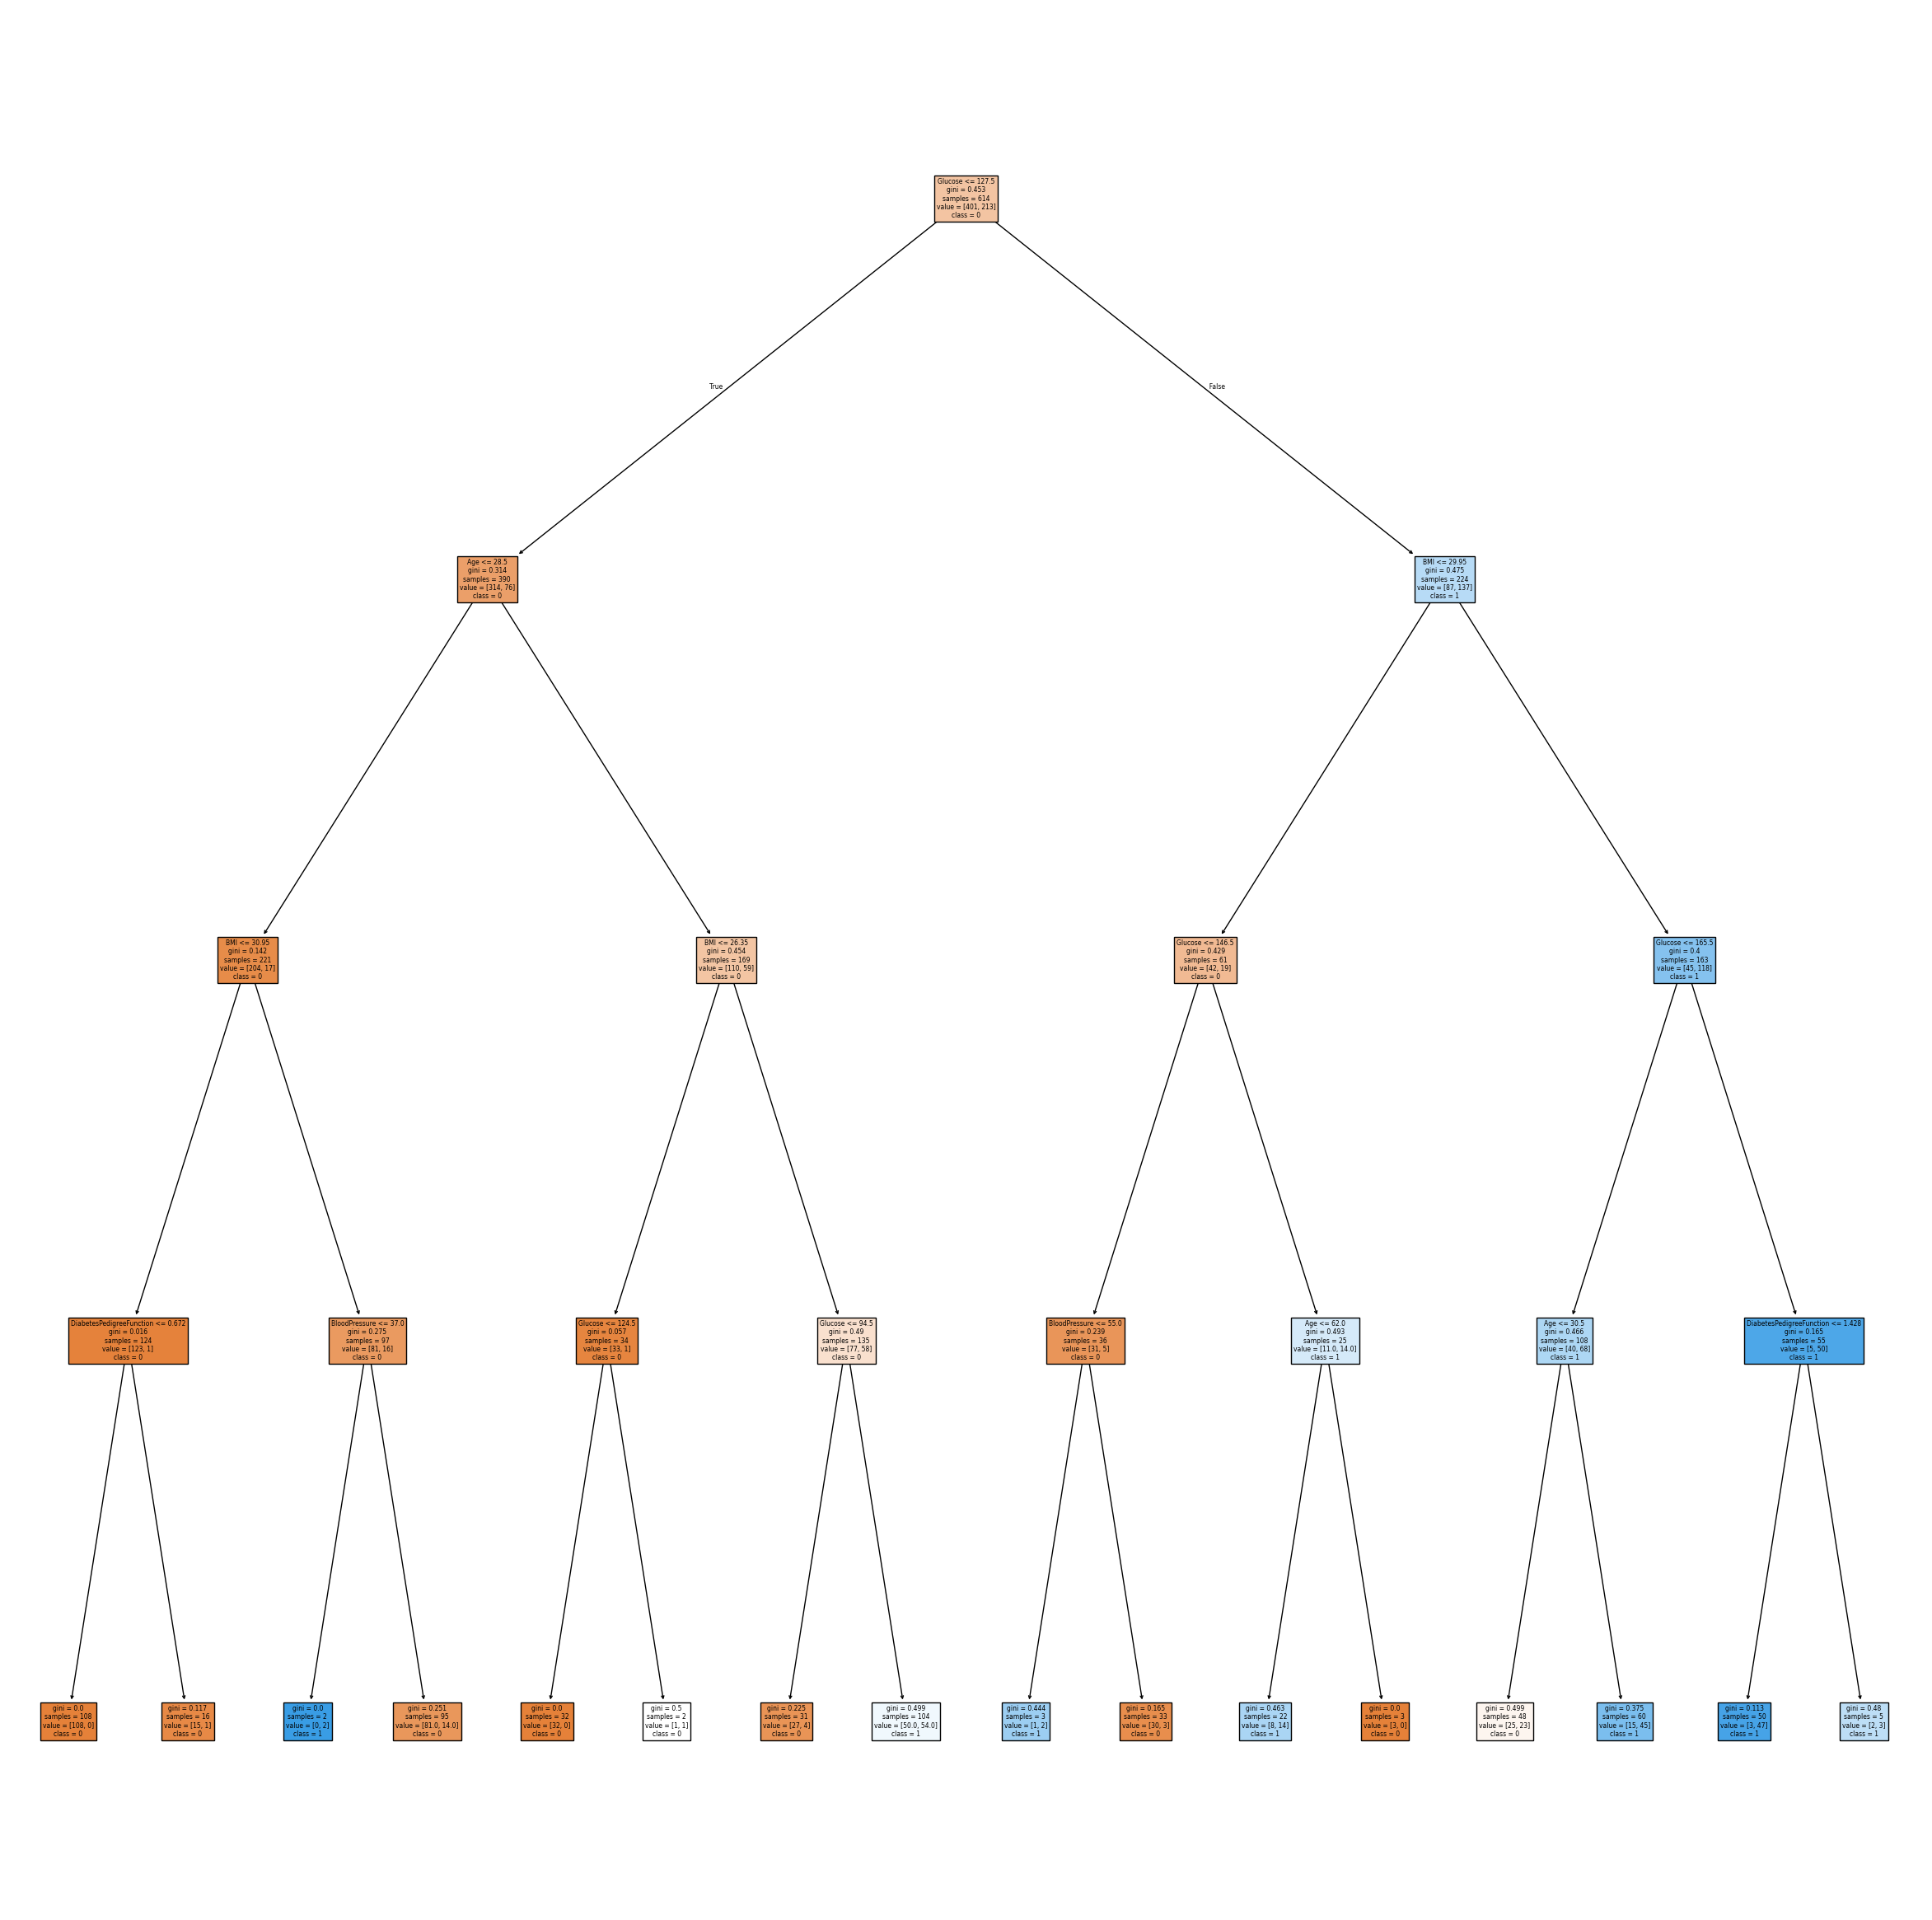

In [109]:
fig = plt.figure(figsize=(30,30))

tree.plot_tree(best, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
plt.savefig("diabetes_best.jpg")
plt.show()

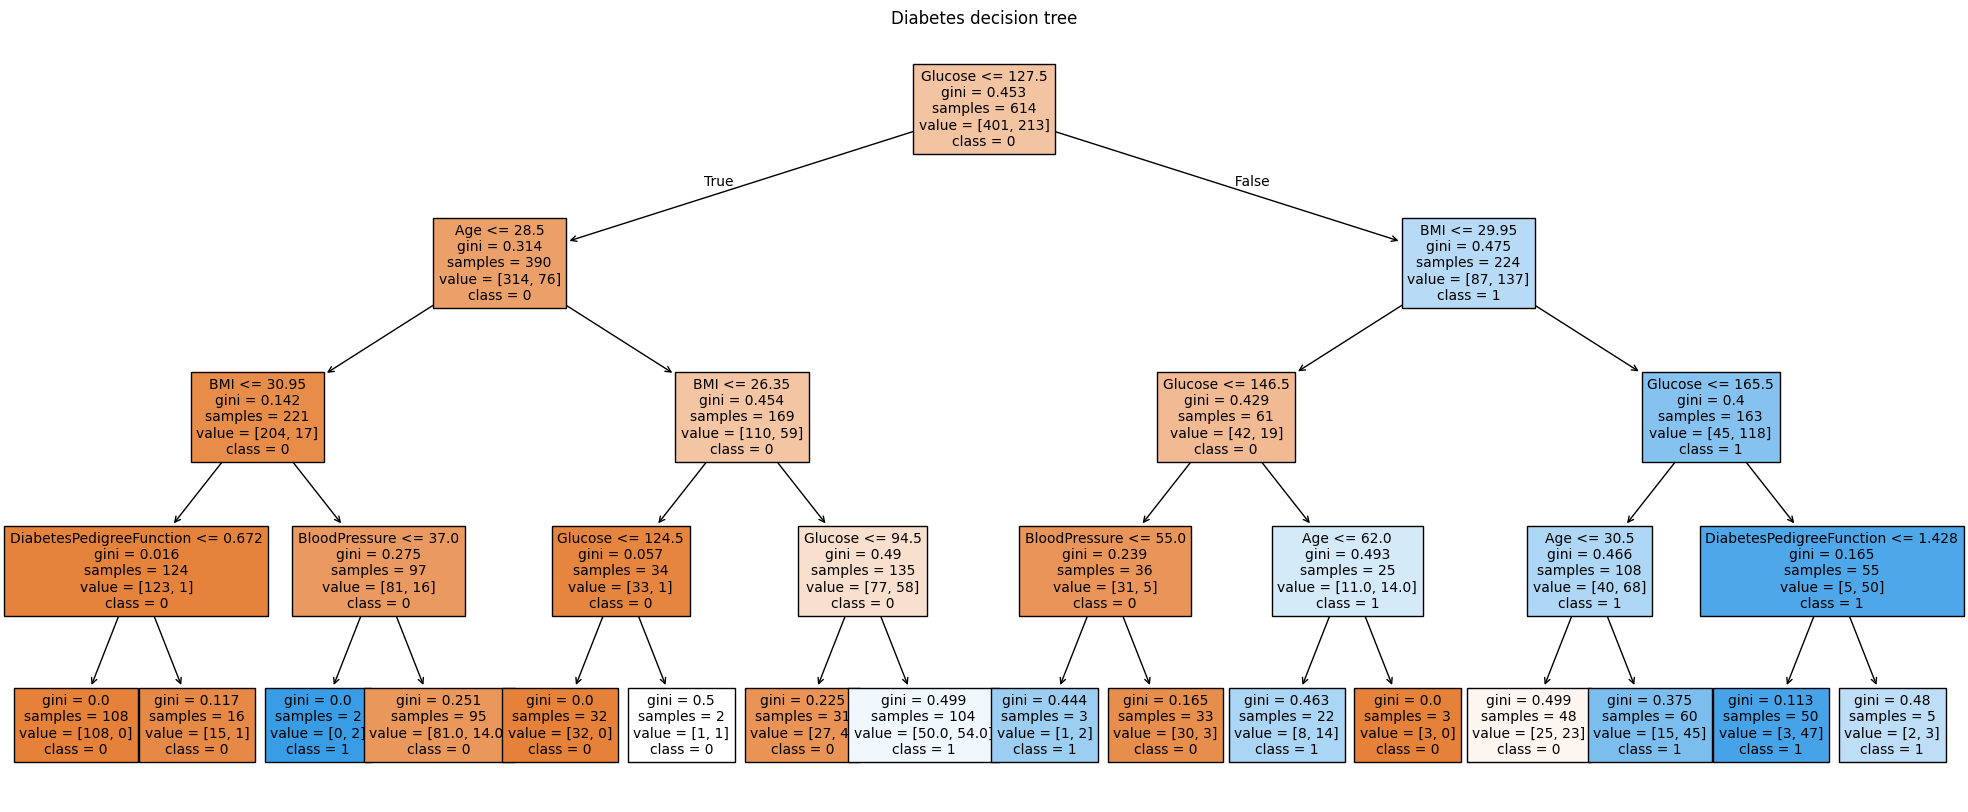

In [121]:
fig = plt.figure(figsize=(25,10))

tree.plot_tree(best, feature_names = list(X_train.columns), class_names = ["0", "1"], fontsize=10, filled = True)
plt.savefig("diabetes_best.jpg")
plt.title("Diabetes decision tree")
plt.show()